# CẤU HÌNH VÀ IMPORT THƯ VIỆN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings 
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 1)

# ĐỌC BỘ DỮ LIỆU THÔ

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9830200475,20150323T000000,525000.0,3.0,3.25,2200,7440,2.0,0,0,4,7,1710,490,1947,0,98118,47.5409,-122.268,1260,6765
1,4233800020,20141008T000000,270000.0,4.0,2.50,2701,5821,2.0,0,0,3,7,2701,0,2013,0,98092,47.2873,-122.177,2566,5843
2,7340600068,20140514T000000,215000.0,2.0,1.00,1240,7200,1.0,0,0,3,7,1240,0,1967,0,98168,47.4971,-122.282,1130,9200
3,3023059012,20140910T000000,389900.0,4.0,1.00,1710,117176,1.5,0,0,4,6,1710,0,1942,0,98055,47.4497,-122.212,1940,12223
4,8856970440,20150506T000000,353500.0,3.0,2.50,2020,4845,2.0,0,0,3,7,2020,0,2001,0,98038,47.3848,-122.033,1930,5134


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id               0 
date             0 
price            0 
bedrooms         13
bathrooms        10
sqft_living      0 
sqft_lot         0 
floors           0 
waterfront       0 
view             0 
condition        0 
grade            0 
sqft_above       0 
sqft_basement    0 
yr_built         0 
yr_renovated     0 
zipcode          0 
lat              0 
long             0 
sqft_living15    0 
sqft_lot15       0 
dtype: int64

In [6]:
df[['date', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']].head(3)

,date,yr_renovated,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,20150323T000000,0,2200,7440,1710,490,1260,6765,525000.0
1,20141008T000000,0,2701,5821,2701,0,2566,5843,270000.0
2,20140514T000000,0,1240,7200,1240,0,1130,9200,215000.0


# DATA WRANGLING

In [7]:
df1 = df.copy()

## XỬ LÝ CÁC NỘI DUNG TRONG CỘT 'DATE'

In [8]:
def xulyDate(df):
    sum = int(0)
    for i in range(len(df)):
        if "T000000" in df1.loc[i, 'date']:
            date_temp = df1.loc[i, 'date'][0:8]
            year = date_temp[0:4] 
            month = date_temp[4:6]
            day = date_temp[6:8]
            date_per = str(day) + '/' + str(month) + '/' + str(year)
            df1.loc[i, 'date'] = date_per
xulyDate(df1)

In [9]:
df1['date'].unique()

array(['23/03/2015', '08/10/2014', '14/05/2014', '10/09/2014',
       '06/05/2015', '08/05/2014', '15/01/2015', '05/05/2014',
       '27/10/2014', '08/12/2014', '08/07/2014', '11/07/2014',
       '27/03/2015', '02/12/2014', '24/04/2015', '14/01/2015',
       '25/04/2015', '07/08/2014', '07/04/2015', '12/10/2014',
       '30/05/2014', '17/07/2014', '02/07/2014', '29/09/2014',
       '20/02/2015', '20/01/2015', '28/10/2014', '02/05/2014',
       '01/12/2014', '30/06/2014', '22/05/2014', '17/04/2015',
       '21/07/2014', '18/02/2015', '19/08/2014', '05/06/2014',
       '22/04/2015', '11/03/2015', '25/07/2014', '09/05/2014',
       '07/11/2014', '13/03/2015', '13/04/2015', '29/10/2014',
       '19/11/2014', '05/08/2014', '31/12/2014', '09/06/2014',
       '24/07/2014', '17/11/2014', '11/08/2014', '10/07/2014',
       '12/01/2015', '13/05/2014', '29/07/2014', '14/11/2014',
       '19/03/2015', '20/06/2014', '30/09/2014', '04/12/2014',
       '26/03/2015', '20/05/2014', '09/03/2015', '29/12

## XÓA CÁC DÒNG KHUYẾT CỦA CỘT 'BEDROOMS'

In [10]:
df1.dropna(subset='bedrooms', axis=0, inplace=True)

## XÓA CÁC DÒNG KHUYẾT CỦA CỘT 'BATHROOMS'

In [11]:
df1.dropna(subset='bathrooms', axis=0, inplace=True)

## ĐẶT LẠI INDEX SAU KHI XÓA CÁC DÒNG KHUYẾT

In [12]:
df1.reset_index(inplace=True)

In [13]:
df1.drop('index', axis=1, inplace=True)

## XỬ LÝ NỘI DUNG TRONG CỘT BATHROOMS

In [14]:
def xulyBathroom(df):
    for i in df.index:
        df.loc[i, 'bathrooms'] = math.ceil(df.loc[i, 'bathrooms'])
xulyBathroom(df1)

## XỬ LÝ LẠI NỘI DUNG CỘT 'price': từ đô chuyển sang (nghìn đô)

In [15]:
def xulyPrice(df):
    for i in range(len(df)):
        df.loc[i, 'price'] = (df.loc[i, 'price'] / 1000)
xulyPrice(df1)

## KIỂM TRA LẠI df1

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## KIỂM TRA LẠI CÁC GIÁ TRỊ NULL

In [17]:
df1.shape

(21597, 21)

In [18]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## KẾT LUẬN: ĐÃ KHÔNG CÒN CỘT TỒN TẠI GIÁ TRỊ NULL

# CÁC THỐNG KÊ DỮ LIỆU VÀ TRỰC QUAN HÓA BỘ DỮ LIỆU

## TÌM CÁC BIẾN ẢNH HƯỞNG ĐẾN GIÁ NHÀ (ĐÁNH GIÁ DỰA VÀO VẼ REGPLOT VÀ ĐỘ TƯƠNG QUAN PEARSON)

### Biến 'bedrooms'

#### Vẽ REGPLOT

<Axes: xlabel='bedrooms', ylabel='price'>

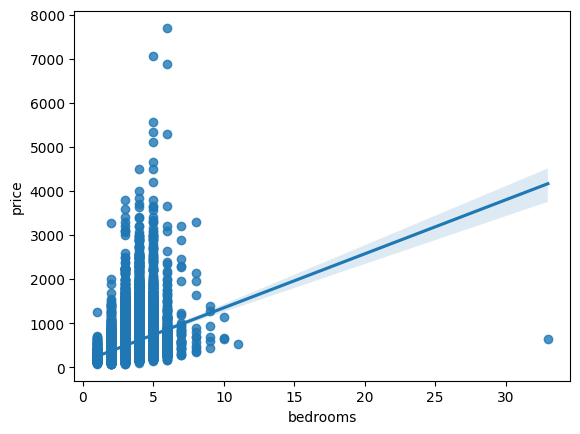

In [19]:
sns.regplot(x='bedrooms', y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [20]:
r, p = stats.pearsonr(df1['bedrooms'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.30879392551587576
p:  0.0


#### KẾT LUẬN

### Biến 'bathrooms'

#### VẼ REGPLOT

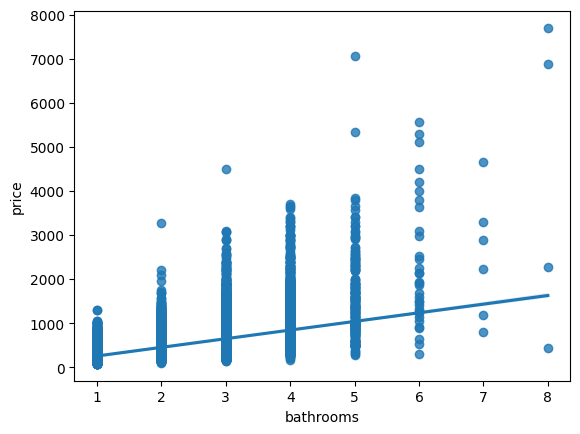

In [21]:
sns.regplot(x='bathrooms', y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [22]:
r, p = stats.pearsonr(df1['bathrooms'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.49252101008943516
p:  0.0


#### KẾT LUẬN

### Biến 'sqft_living'

#### Vẽ REGPLOT

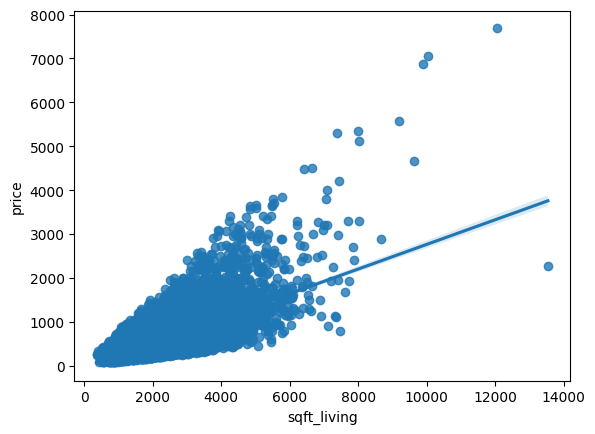

In [23]:
sns.regplot(x='sqft_living', y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [24]:
r, p = stats.pearsonr(df1['sqft_living'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.7019092759952834
p:  0.0


#### KẾT LUẬN

### Biến 'sqft_lot'

#### Vẽ REGPLOT

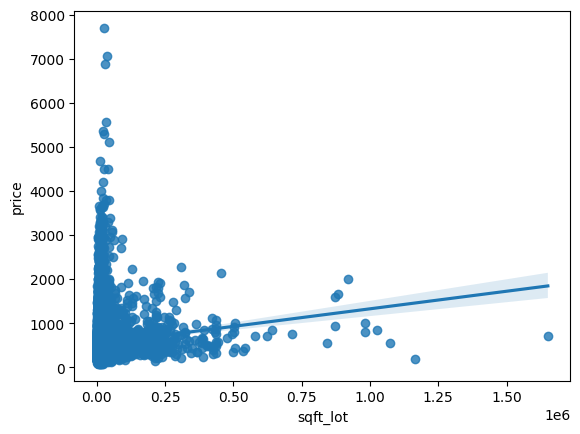

In [25]:
sns.regplot(x='sqft_lot', y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [26]:
r, p = stats.pearsonr(df1['sqft_lot'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.08988178067260208
p:  5.5110004491736636e-40


#### KẾT LUẬN

### Biến 'floors'

#### Vẽ REGPLOT

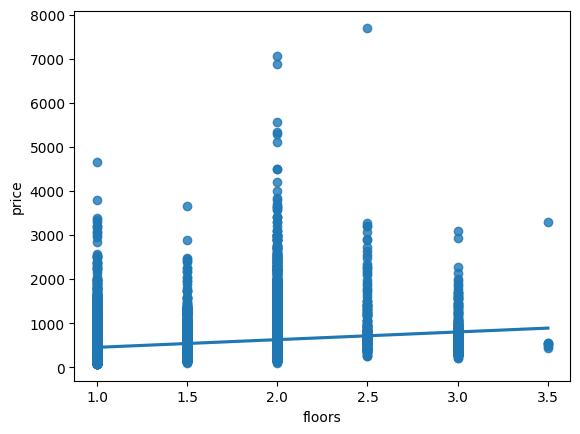

In [27]:
sns.regplot(x='floors', y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [28]:
r, p = stats.pearsonr(df1['floors'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.25681384584375955
p:  2.37e-322


#### KẾT LUẬN

### Biến 'waterfront'

#### Vẽ REGPLOT

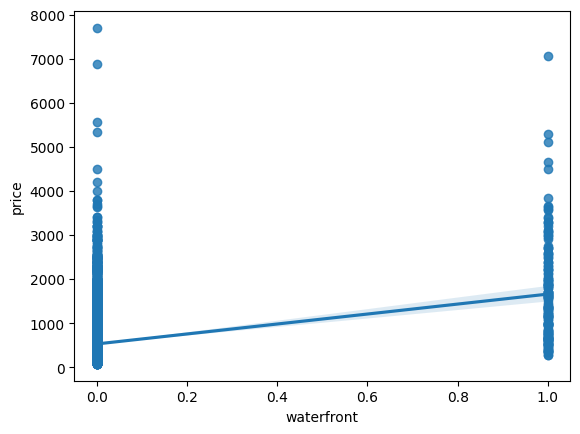

In [29]:
sns.regplot(x='waterfront', y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [30]:
r, p = stats.pearsonr(df1['waterfront'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.26643683291212633
p:  0.0


#### KẾT LUẬN

### Biến 'view'

#### Vẽ REGPLOT

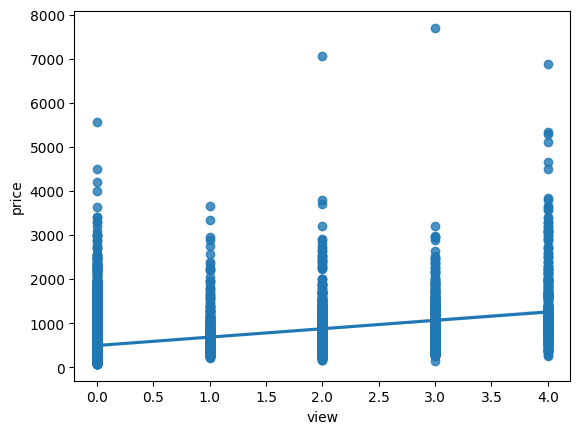

In [31]:
sns.regplot(x='view',  y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [32]:
r, p = stats.pearsonr(df1['view'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.3973177380686916
p:  0.0


#### KẾT LUẬN

### Biến 'condition'

#### Vẽ REGPLOT

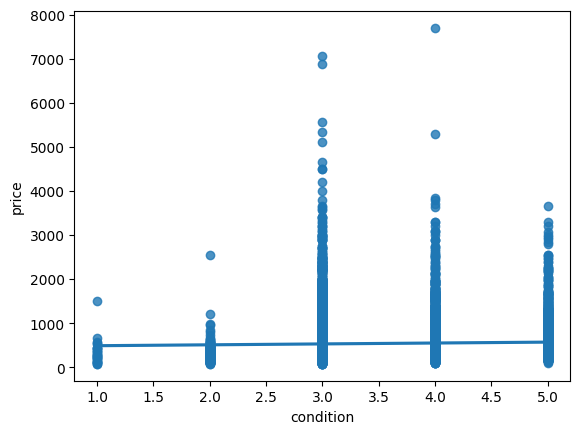

In [33]:
sns.regplot(x='condition',  y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [34]:
r, p = stats.pearsonr(df1['condition'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.03602532470560022
p:  1.1858435814925485e-07


#### KẾT LUẬN

### Biến 'grade'

#### Vẽ REGPLOT

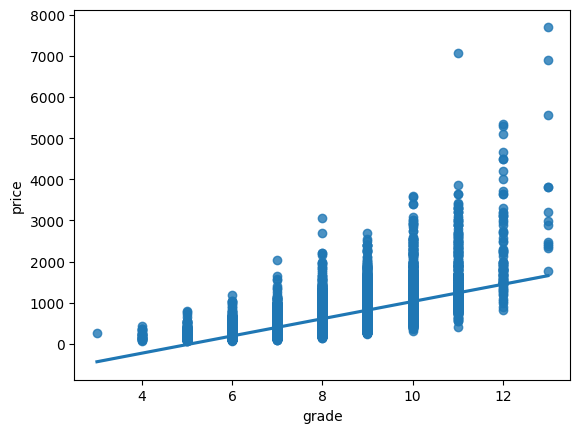

In [35]:
sns.regplot(x='grade',  y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [36]:
r, p = stats.pearsonr(df1['grade'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.6679221497820436
p:  0.0


#### KẾT LUẬN

### Biến 'sqft_above'

#### Vẽ REGPLOT

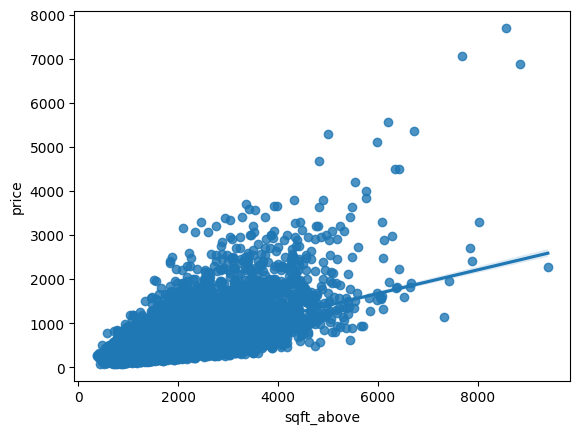

In [37]:
sns.regplot(x='sqft_above',  y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [38]:
r, p = stats.pearsonr(df1['sqft_above'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.6053711742561592
p:  0.0


#### KẾT LUẬN

### Biến sqft_basement

#### Vẽ REGPLOT

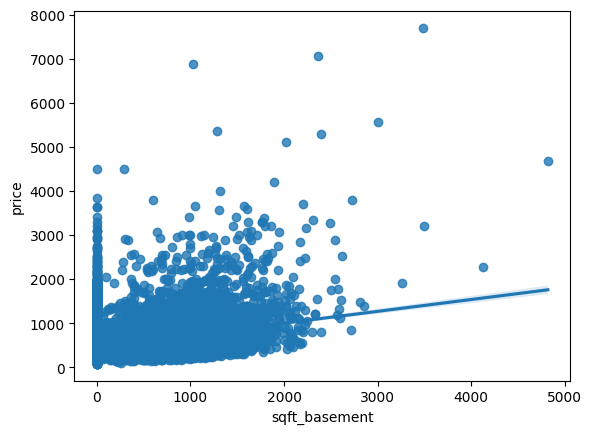

In [39]:
sns.regplot(x='sqft_basement',  y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [40]:
r, p = stats.pearsonr(df1['sqft_basement'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.32377621952340946
p:  0.0


#### KẾT LUẬN

### Biến sqft_living15

#### Vẽ REGPLOT

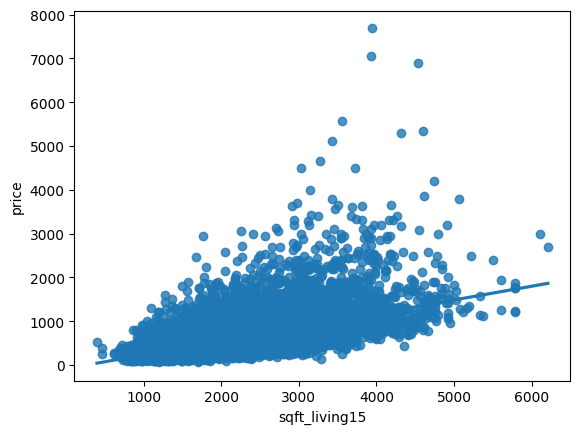

In [41]:
sns.regplot(x='sqft_living15',  y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [42]:
r, p = stats.pearsonr(df1['sqft_living15'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.585247228585365
p:  0.0


#### KẾT LUẬN

### Biến sqft_lot15

#### Vẽ REGPLOT

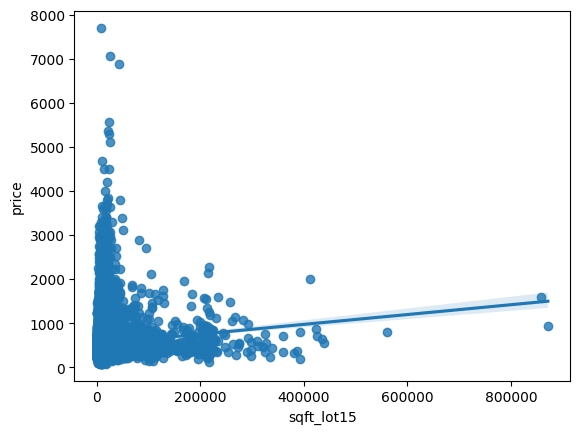

In [43]:
sns.regplot(x='sqft_lot15',  y='price', data=df1);

#### ĐỘ TƯƠNG QUAN PEARSON

In [44]:
r, p = stats.pearsonr(df1['sqft_lot15'], df1['price'])
print("r: ", r)
print("p: ", p)

r:  0.0828366840128312
p:  3.351335608433258e-34


#### KẾT LUẬN

## KẾT LUẬN VỀ CÁC BIẾN ẢNH HƯỞNG

# XÂY DỰNG MÔ HÌNH

## MÔ HÌNH ĐƠN THỨC ĐƠN BIẾN

### Biến sqft_living15

In [45]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df1[['sqft_living15']], df1['price'], test_size=0.3, random_state=0)

In [46]:
print('Số lượng các phần tử trong tập train: ', x_train1.shape[0])
print('Số lượng các phần tử trong tập test: ', x_test1.shape[0])

Số lượng các phần tử trong tập train:  15117
Số lượng các phần tử trong tập test:  6480


In [47]:
lm1 = LinearRegression()
lm1.fit(x_train1[['sqft_living15']], y_train1)

LinearRegression()

In [48]:
Yhat_sqft_living15 = lm1.predict(x_test1[['sqft_living15']])

In [49]:
print('intercept: ', lm1.intercept_)
print('coef: ', lm1.coef_)
print("Mô hình: PRICE = ", lm1.intercept_, " + ", lm1.coef_[0], "*sqft_living15")

intercept:  -79.74606488891527
coef:  [0.31112488]
Mô hình: PRICE =  -79.74606488891527  +  0.3111248759109591 *sqft_living15


### Biến sqft_above

In [50]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df1[['sqft_above']], df1['price'], test_size=0.3, random_state=0)

In [51]:
print('Số lượng các phần tử trong tập train: ', x_train2.shape[0])
print('Số lượng các phần tử trong tập test: ', x_test2.shape[0])

Số lượng các phần tử trong tập train:  15117
Số lượng các phần tử trong tập test:  6480


In [52]:
lm2 = LinearRegression()
lm2.fit(x_train2[['sqft_above']], y_train2)

LinearRegression()

In [53]:
Yhat_sqft_above = lm2.predict(x_test2[['sqft_above']])

In [54]:
print('intercept: ', lm2.intercept_)
print('coef: ', lm2.coef_)
print("Mô hình: PRICE = ", lm2.intercept_, " + ", lm2.coef_[0], "*sqft_above")

intercept:  70.15719834069785
coef:  [0.26108562]
Mô hình: PRICE =  70.15719834069785  +  0.2610856211319151 *sqft_above


### Biến grade

In [55]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df1[['grade']], df1['price'], test_size=0.3, random_state=0)

In [56]:
print('Số lượng các phần tử trong tập train: ', x_train3.shape[0])
print('Số lượng các phần tử trong tập test: ', x_test3.shape[0])

Số lượng các phần tử trong tập train:  15117
Số lượng các phần tử trong tập test:  6480


In [57]:
lm3 = LinearRegression()
lm3.fit(x_train3[['grade']], y_train3)

LinearRegression()

In [58]:
Yhat_grade = lm3.predict(x_test3[['grade']])

In [59]:
print('intercept: ', lm3.intercept_)
print('coef: ', lm3.coef_)
print("Mô hình: PRICE = ", lm3.intercept_, " + ", lm3.coef_[0], "*grade")

intercept:  -1042.0215578401103
coef:  [206.25351238]
Mô hình: PRICE =  -1042.0215578401103  +  206.2535123793599 *grade


### Biến sqft_living

In [60]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(df1[['sqft_living']], df1['price'], test_size=0.3, random_state=0)

In [61]:
print('Số lượng các phần tử trong tập train: ', x_train4.shape[0])
print('Số lượng các phần tử trong tập test: ', x_test4.shape[0])

Số lượng các phần tử trong tập train:  15117
Số lượng các phần tử trong tập test:  6480


In [62]:
lm4 = LinearRegression()
lm4.fit(x_train4[['sqft_living']], y_train4)

LinearRegression()

In [63]:
Yhat_sqft_living = lm4.predict(x_test4[['sqft_living']])

In [64]:
print('intercept: ', lm4.intercept_)
print('coef: ', lm4.coef_)
print("Mô hình: PRICE = ", lm4.intercept_, " + ", lm4.coef_[0], "*sqft_living")

intercept:  -32.06032909301848
coef:  [0.2740605]
Mô hình: PRICE =  -32.06032909301848  +  0.27406050351215344 *sqft_living


## MÔ HÌNH ĐƠN THỨC ĐA BIẾN

In [65]:
Z = df1[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

In [66]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(Z, df1['price'], test_size=0.3, random_state=0)

In [67]:
lm_m = LinearRegression()
lm_m.fit(x_train_m, y_train_m)

LinearRegression()

In [68]:
Yhat_dabien = lm_m.predict(x_test_m)

In [69]:
print("intercept: ", lm_m.intercept_)
print("coef: ", lm_m.coef_)
print("Mô hình: PRICE = ", lm_m.intercept_, " + ", lm_m.coef_[0], "*sqft_living", " + ", lm_m.coef_[1], "*grade", " + ", lm_m.coef_[2], "*sqft_above", " + ", lm_m.coef_[3], "*sqft_living15")

intercept:  -661.7709502139095
coef:  [ 2.16004970e-01  1.08948355e+02 -8.69705893e-02  3.61263478e-02]
Mô hình: PRICE =  -661.7709502139095  +  0.21600496957171375 *sqft_living  +  108.94835514523176 *grade  +  -0.08697058931970503 *sqft_above  +  0.03612634783834068 *sqft_living15


## MÔ HÌNH ĐA THỨC ĐƠN BIẾN

In [70]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Biến sqft_living

In [71]:
lm5 = LinearRegression()

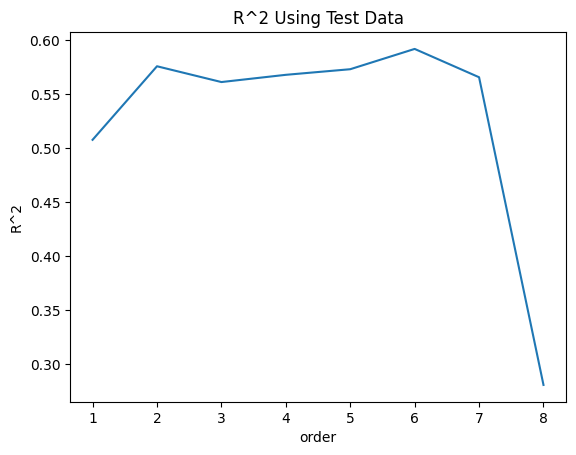

In [72]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(df1[['sqft_living']], df1['price'], test_size=0.3, random_state=0)
Rsqu_test = []
order = [1, 2, 3, 4, 5, 6, 7, 8]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train5[['sqft_living']])
    x_test_pr = pr.fit_transform(x_test5[['sqft_living']])
    
    lm5.fit(x_train_pr,y_train5)
    Rsqu_test.append(lm5.score(x_test_pr,y_test5))
    
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

In [73]:
pr_sqft_living = PolynomialFeatures(degree=6, include_bias=False)
x_train_sqft_living_p = pr_sqft_living.fit_transform(x_train5[['sqft_living']])
x_test_sqft_living_p = pr_sqft_living.fit_transform(x_test5[['sqft_living']])

In [74]:
lm5 = LinearRegression()
lm5.fit(x_train_sqft_living_p, y_train5)

LinearRegression()

In [75]:
Yhat_poly_sqft_living = lm5.predict(x_test_sqft_living_p)

In [76]:
print("Predicted values: ", Yhat_poly_sqft_living[0:5])
print("Actual values: ", y_test5[0:5].values)

Predicted values:  [1160.62942731  634.94994415  521.54261887  386.23181812  310.23601868]
Actual values:  [1300.    538.    300.    419.95  215.  ]


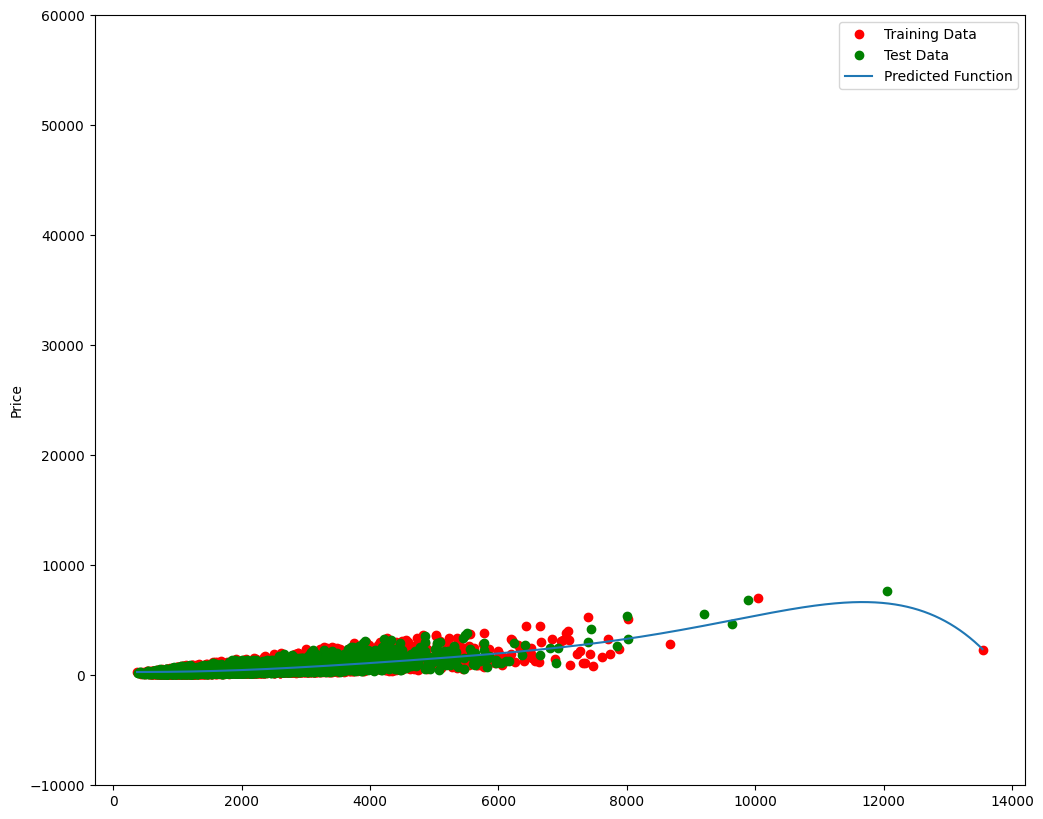

In [77]:
PollyPlot(x_train5[['sqft_living']], x_test5[['sqft_living']], y_train5, y_test5, lm5, pr_sqft_living)

In [78]:
lm5.score(x_train_sqft_living_p, y_train5)

0.5260024146825539

In [79]:
lm5.score(x_test_sqft_living_p, y_test5)

0.5920336283366983

### Biến grade

In [80]:
lm6 = LinearRegression()

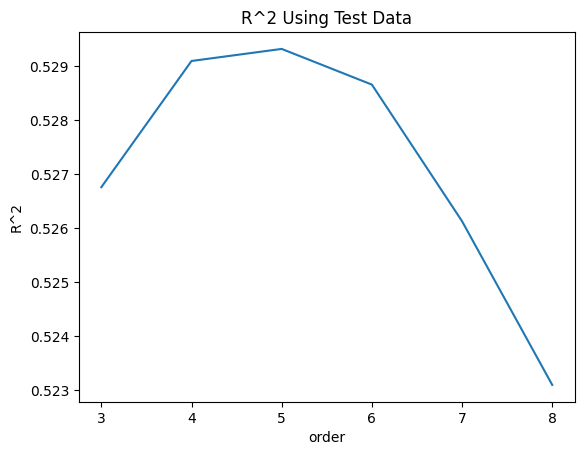

In [81]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(df1[['grade']], df1['price'], test_size=0.3, random_state=0)
Rsqu_test = []
order = [3, 4, 5, 6, 7, 8]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train6[['grade']])
    x_test_pr = pr.fit_transform(x_test6[['grade']])
    
    lm6.fit(x_train_pr,y_train6)
    Rsqu_test.append(lm6.score(x_test_pr,y_test6))
    
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

In [82]:
pr_grade = PolynomialFeatures(degree=5, include_bias=False)
x_train_grade = pr_grade.fit_transform(x_train6[['grade']])
x_test_grade = pr_grade.fit_transform(x_test6[['grade']])

In [83]:
lm6 = LinearRegression()
lm6.fit(x_train_grade, y_train6)

LinearRegression()

In [84]:
Yhat_poly_grade = lm6.predict(x_test_grade)

In [85]:
print("Predicted values: ", Yhat_poly_grade[0:5])
print("Actual values: ", y_test6[0:5].values)

Predicted values:  [1513.66718193  546.89169334  546.89169334  398.86375474  301.2173989 ]
Actual values:  [1300.    538.    300.    419.95  215.  ]


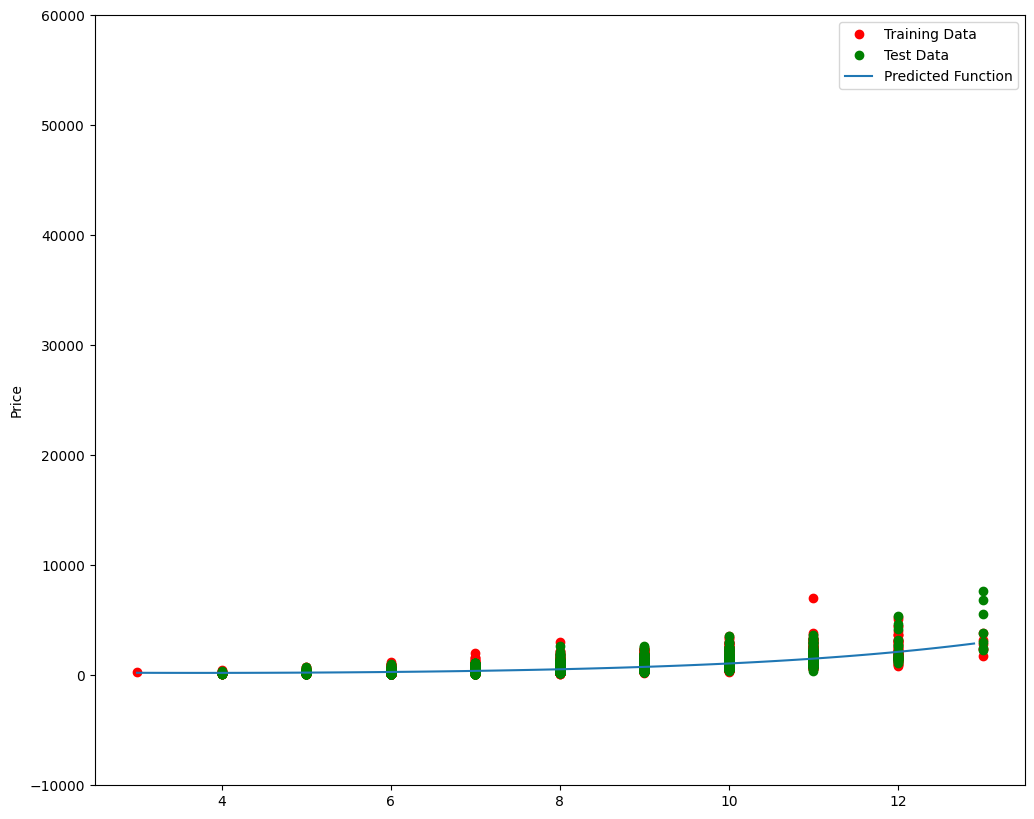

In [86]:
PollyPlot(x_train6[['grade']], x_test6[['grade']], y_train6, y_test6, lm6, pr_grade)

R^2 của train data

In [87]:
lm6.score(x_train_grade, y_train6)

0.5110903393151877

R^2 của test data

In [88]:
lm6.score(x_test_grade, y_test6)

0.5293191644457116

### Biến sqft_above

In [89]:
lm7 = LinearRegression()

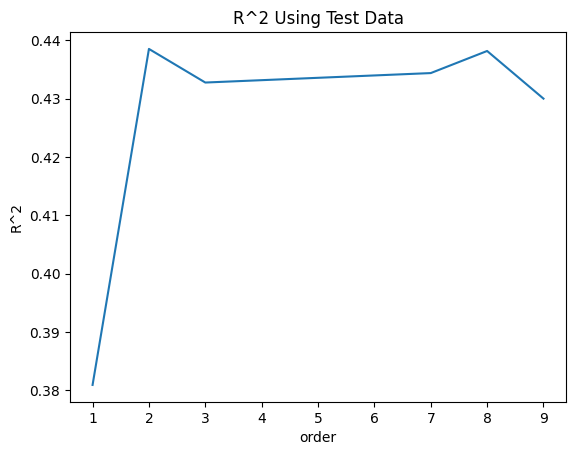

In [90]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(df1[['sqft_above']], df1['price'], test_size=0.3, random_state=0)
Rsqu_test = []
order = [1, 2, 3, 7, 8, 9]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train7[['sqft_above']])
    x_test_pr = pr.fit_transform(x_test7[['sqft_above']])
    
    lm7.fit(x_train_pr,y_train7)
    Rsqu_test.append(lm7.score(x_test_pr,y_test7))
    
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

In [91]:
pr_sqft_above = PolynomialFeatures(degree=2, include_bias=False)
x_train_sqft_above = pr_sqft_above.fit_transform(x_train7[['sqft_above']])
x_test_sqft_above = pr_sqft_above.fit_transform(x_test7[['sqft_above']])

In [92]:
lm7 = LinearRegression()
lm7.fit(x_train_sqft_above, y_train7)

LinearRegression()

In [93]:
Yhat_poly_sqft_above = lm7.predict(x_test_sqft_above)

In [94]:
print("Predicted values: ", Yhat_poly_sqft_above[0:5])
print("Actual values: ", y_test7[0:5].values)

Predicted values:  [1234.02808623  547.85926147  602.28738675  372.67335571  342.63859129]
Actual values:  [1300.    538.    300.    419.95  215.  ]


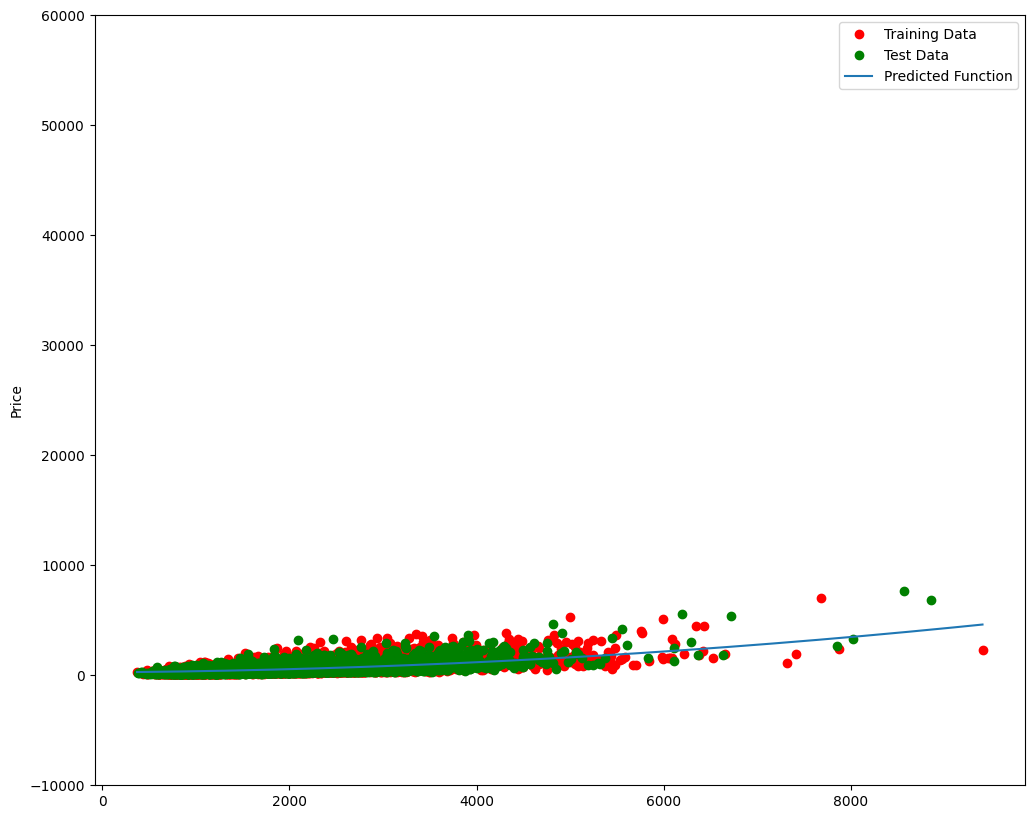

In [95]:
PollyPlot(x_train7[['sqft_above']], x_test7[['sqft_above']], y_train7, y_test7, lm7, pr_sqft_above)

In [96]:
lm7.score(x_train_sqft_above, y_train7)

0.3791506427178314

In [97]:
lm7.score(x_test_sqft_above, y_test7)

0.4385144271471254

### Biến sqft_living15

In [98]:
lm8 = LinearRegression()

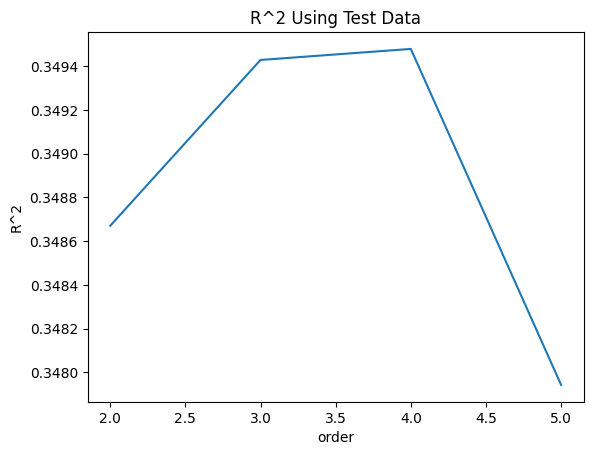

In [99]:
x_train8, x_test8, y_train8, y_test8 = train_test_split(df1[['sqft_living15']], df1['price'], test_size=0.3, random_state=0)
Rsqu_test = []
order = [2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train8[['sqft_living15']])
    x_test_pr = pr.fit_transform(x_test8[['sqft_living15']])
    
    lm8.fit(x_train_pr,y_train8)
    Rsqu_test.append(lm8.score(x_test_pr,y_test8))
    
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

In [100]:
pr_sqft_living15 = PolynomialFeatures(degree=4, include_bias=False)
x_train_sqft_living15 = pr_sqft_living15.fit_transform(x_train8[['sqft_living15']])
x_test_sqft_living15 = pr_sqft_living15.fit_transform(x_test8[['sqft_living15']])

In [101]:
lm8 = LinearRegression()
lm8.fit(x_train_sqft_living15, y_train8)

LinearRegression()

In [102]:
Yhat_poly_sqft_living15 = lm8.predict(x_test_sqft_living15)

In [103]:
print("Predicted values: ", Yhat_poly_sqft_living15[0:5])
print("Actual values: ", y_test8[0:5].values)

Predicted values:  [1563.85214397  494.33451218  483.18051785  438.1711256   440.09927231]
Actual values:  [1300.    538.    300.    419.95  215.  ]


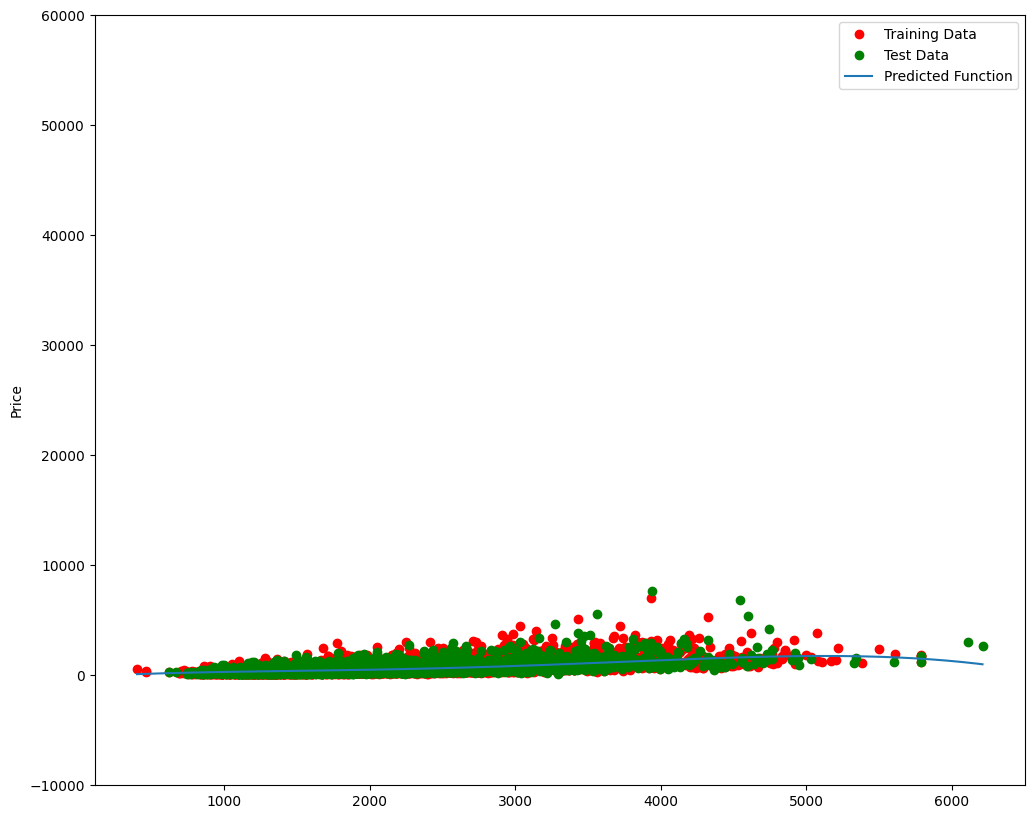

In [104]:
PollyPlot(x_train8[['sqft_living15']], x_test8[['sqft_living15']], y_train8, y_test8, lm8, pr_sqft_living15)

In [105]:
lm8.score(x_train_sqft_living15, y_train8)

0.37019480385298154

In [106]:
lm8.score(x_test_sqft_living15, y_test8)

0.34947932661503334

## MÔ HÌNH ĐA THỨC ĐA BIẾN

In [107]:
Z = df1[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

In [108]:
lm_m_p = LinearRegression()

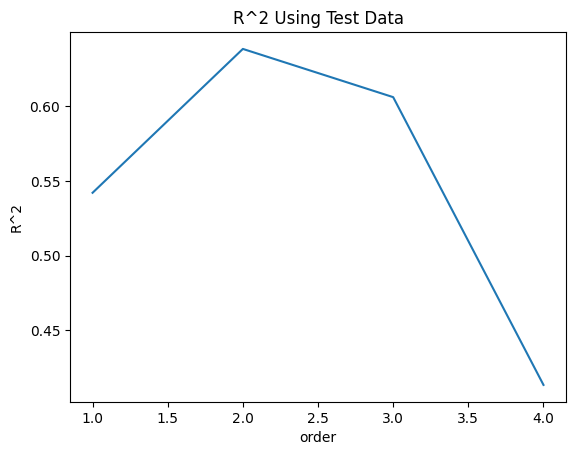

In [109]:
x_train_m_p, x_test_m_p, y_train_m_p, y_test_m_p = train_test_split(Z, df1['price'], test_size=0.3, random_state=0)
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train_m_p[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
    x_test_pr = pr.fit_transform(x_test_m_p[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
    
    lm_m_p.fit(x_train_pr,y_train_m_p)
    Rsqu_test.append(lm_m_p.score(x_test_pr,y_test_m_p))
    
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

In [110]:
lm_dathuc_p = PolynomialFeatures(degree=2)
x_train_m_poly = lm_dathuc_p.fit_transform(x_train_m_p)
x_test_m_poly = lm_dathuc_p.fit_transform(x_test_m_p)

In [111]:
lm_m_p1 = LinearRegression()
lm_m_p1.fit(x_train_m_poly, y_train_m_p)

LinearRegression()

In [112]:
Yhat_dabien_multi = lm_m_p1.predict(x_test_m_poly)

In [113]:
print("Predicted values: ", Yhat_dabien_multi[0:5])
print("Actual values: ", y_test_m_p[0:5].values)

Predicted values:  [1279.3209285   635.69904301  505.59549563  413.99259999  310.05011581]
Actual values:  [1300.    538.    300.    419.95  215.  ]


In [114]:
lm_m_p1.score(x_train_m_poly, y_train_m_p)

0.6070606391285869

In [115]:
lm_m_p1.score(x_test_m_poly, y_test_m_p)

0.6384484212504787

# ĐÁNH GIÁ MÔ HÌNH

## MÔ HÌNH ĐƠN THỨC ĐƠN BIẾN

### Biến sqft_living15

In [116]:
r2_score(y_test1, Yhat_sqft_living15)

0.3282122911716082

In [117]:
mean_squared_error(y_test1, Yhat_sqft_living15)

99954.66758610854

### Biến sqft_above

In [118]:
r2_score(y_test2, Yhat_sqft_above)

0.38092091388071514

In [119]:
mean_squared_error(y_test1, Yhat_sqft_above)

92112.20069876597

### Biến grade

In [120]:
r2_score(y_test3, Yhat_grade)

0.4358647910595552

In [121]:
mean_squared_error(y_test3, Yhat_grade)

83937.15238047969

### Biến sqft_living

In [122]:
r2_score(y_test4, Yhat_sqft_living)

0.50779984077556

In [123]:
mean_squared_error(y_test4, Yhat_sqft_living)

73234.00332362461

## MÔ HÌNH ĐA THỨC THỨC ĐƠN BIẾN

### Biến sqft_living15

In [124]:
r2_score(y_test8, Yhat_poly_sqft_living15)

0.34947932661503334

In [125]:
mean_squared_error(y_test8, Yhat_poly_sqft_living15)

96790.36518766652

### Biến sqft_above

In [126]:
r2_score(y_test7, Yhat_poly_sqft_above)

0.4385144271471254

In [127]:
mean_squared_error(y_test7, Yhat_poly_sqft_above)

83542.91549451594

### Biến grade

In [128]:
r2_score(y_test6, Yhat_poly_grade)

0.5293191644457116

In [129]:
mean_squared_error(y_test6, Yhat_poly_grade)

70032.16319487443

### sqft_living

In [130]:
r2_score(y_test6, Yhat_poly_sqft_living)

0.5920336283366983

In [131]:
mean_squared_error(y_test5, Yhat_poly_sqft_living)

60700.936516141155

## MÔ HÌNH ĐƠN THỨC ĐA BIẾN

In [132]:
r2_score(y_test_m, Yhat_dabien)

0.5421646552249937

In [133]:
mean_squared_error(y_test_m, Yhat_dabien)

68120.89458434444

## MÔ HÌNH ĐA THỨC ĐA BIẾN

In [134]:
r2_score(y_test_m_p, Yhat_dabien_multi)

0.6384484212504787

In [135]:
mean_squared_error(y_test_m_p, Yhat_dabien_multi)

53794.92270283973

## KẾT LUẬN VỀ MÔ HÌNH

# ĐÁNH GIÁ LẠI MÔ HÌNH ĐƯỢC CHỌN BẰNG CROSS-VALIDATION

## ĐÁNH GIÁ TẬP KIỂM THỬ

In [136]:
cross_val_scores_train = cross_val_score(lm_m_p1, x_train_m_p, y_train_m_p, cv=4)

In [137]:
cross_val_scores_train

array([0.55265257, 0.54615645, 0.51793587, 0.54709026])

In [138]:
cross_val_scores_train.mean()

0.5409587875038013

## ĐÁNH GIÁ TẬP KIỂM THỬ

In [139]:
r2_score(y_test_m_p, Yhat_dabien_multi)

0.6384484212504787

## ĐÁNH GIÁ TRỰC QUAN

In [140]:
y_train_pred = lm_m_p1.predict(x_train_m_poly)
y_test_pred = lm_m_p1.predict(x_test_m_poly)

In [141]:
df_train = pd.DataFrame({'Actual': y_train_m_p, 'Predicted': y_train_pred})
df_test = pd.DataFrame({'Actual': y_test_m_p, 'Predicted': y_test_pred})

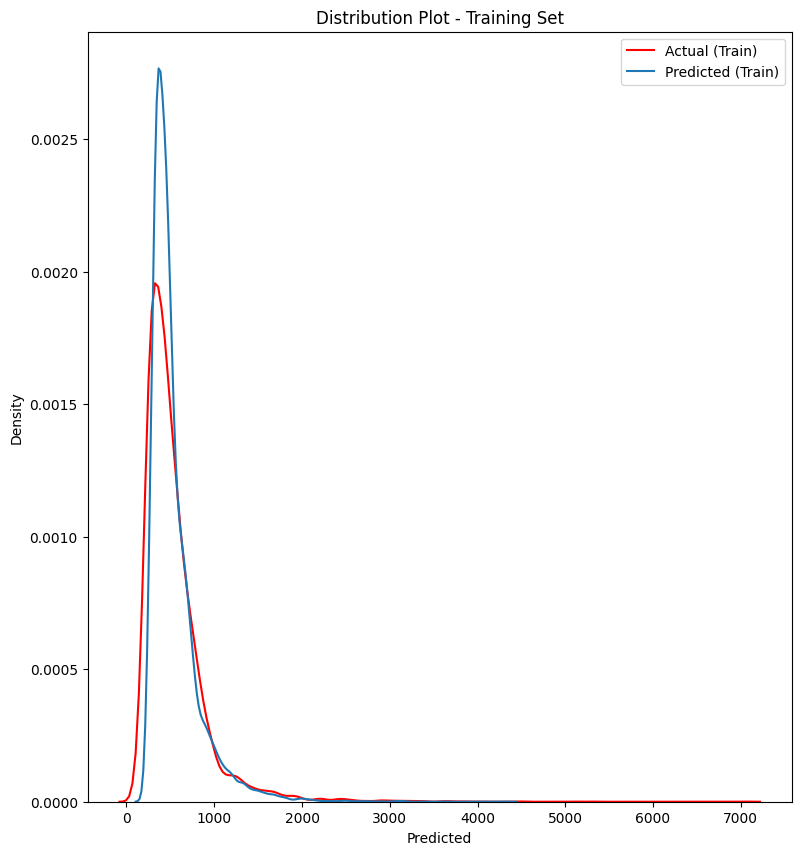

In [142]:
# Biểu đồ phân phối cho tập train
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.distplot(df_train['Actual'], color='r', label='Actual (Train)', hist=False);
sns.distplot(df_train['Predicted'], label='Predicted (Train)', hist=False);
plt.title('Distribution Plot - Training Set');
plt.legend();

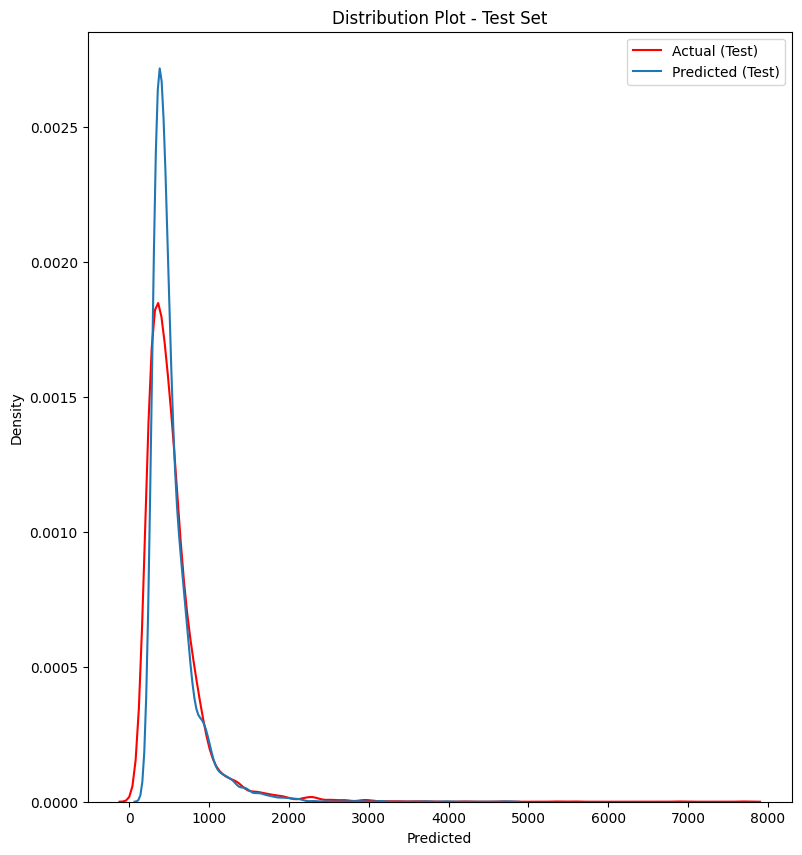

In [143]:
# Biểu đồ phân phối cho tập test
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
sns.distplot(df_test['Actual'], color='r', label='Actual (Test)', hist=False)
sns.distplot(df_test['Predicted'], label='Predicted (Test)', hist=False)
plt.title('Distribution Plot - Test Set')
plt.legend()
plt.show()

# DEPLOY MÔ HÌNH

In [144]:
def API_model(*args) -> float: 
    # Chuyển data test về dạng phù hợp
    lst = [[args[0], args[1], args[2], args[3]]]
    lm_dathuc_temp = PolynomialFeatures(degree=2)
    x_train_poly = lm_dathuc_temp.fit_transform(lst)
    # Trả về giá trị dự đoán
    return lm_m_p1.predict(x_train_poly)[0]

In [145]:
print('GIÁ: ', API_model(4460, 12, 4460, 3770))

GIÁ:  1591.637733801494


In [146]:
df1.loc[1, ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'price']]

sqft_living      2701 
grade            7    
sqft_above       2701 
sqft_living15    2566 
price            270.0
Name: 1, dtype: object

In [147]:
df1.loc[15305, ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'price']]

sqft_living      4460  
grade            12    
sqft_above       4460  
sqft_living15    3770  
price            1550.0
Name: 15305, dtype: object